In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, BatchNormalization, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import shutil
import glob
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.applications import imagenet_utils
#warnings.simplefilter(action = 'ignore', category='FutureWarnings')
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("No.of.GPU's available : ", len(physical_devices))

#tf.config.experimental.set_memory_growth(physical_devices[0], True)

No.of.GPU's available :  0


### Organizing the data

In [7]:
os.chdir("D:\Data Science\Deep Learning\dogs-vs-cats")
if os.path.isfile('train/Dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')        
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c,'train/dog')
        
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
        
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')  
os.chdir('../../')

In [3]:
train_path = r"D:/Data Science/Deep Learning/dogs-vs-cats/train/";
valid_path = r"D:/Data Science/Deep Learning/dogs-vs-cats/valid/";
test_path = r"D:/Data Science/Deep Learning/dogs-vs-cats/test/";

In [34]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = valid_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [35]:
img, labels = next(train_batches)

In [36]:
def plotImages(Images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(Images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

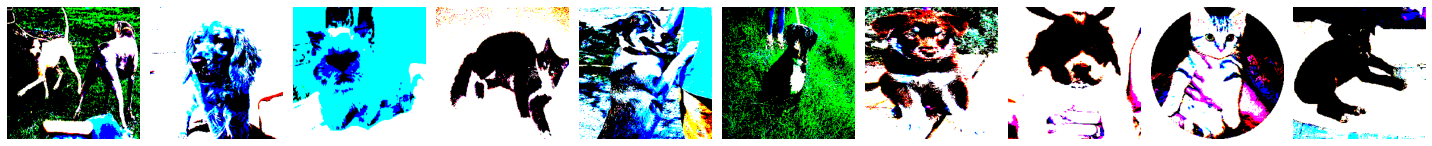

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [37]:
plotImages(img)
print(labels)

### Build and Train CNN

In [8]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax') 
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 5, verbose = 2, batch_size = 30)

Epoch 1/5
100/100 - 24s - loss: 46.5631 - accuracy: 0.5050 - val_loss: 0.6874 - val_accuracy: 0.5450
Epoch 2/5
100/100 - 24s - loss: 0.6131 - accuracy: 0.6790 - val_loss: 0.6816 - val_accuracy: 0.6250
Epoch 3/5
100/100 - 23s - loss: 0.4715 - accuracy: 0.7900 - val_loss: 0.7083 - val_accuracy: 0.6050
Epoch 4/5
100/100 - 23s - loss: 0.2867 - accuracy: 0.9010 - val_loss: 0.9259 - val_accuracy: 0.6150
Epoch 5/5
100/100 - 24s - loss: 0.1249 - accuracy: 0.9670 - val_loss: 0.9816 - val_accuracy: 0.6350


In [15]:
img, labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

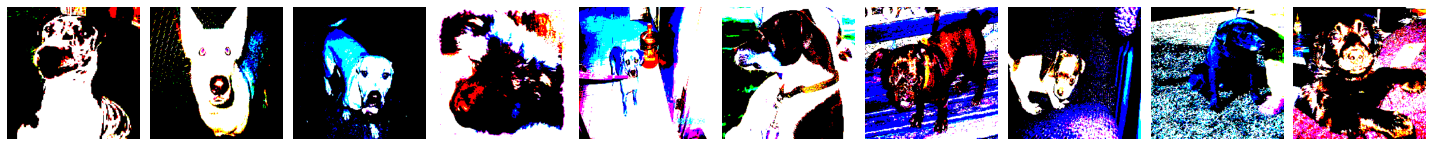

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
plotImages(img)
print(labels)

In [17]:
test_batches.class_indices

{'dog': 0, 'cat': 1}

In [18]:
predictions = model.predict(x = test_batches, verbose = 2)

10/10 - 1s


In [19]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [20]:
cm = confusion_matrix(test_batches.classes, np.argmax(predictions, axis = -1))

In [21]:
cm

array([[34, 16],
       [25, 25]], dtype=int64)

In [22]:
test_batches.class_indices

{'dog': 0, 'cat': 1}

In [23]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.0f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

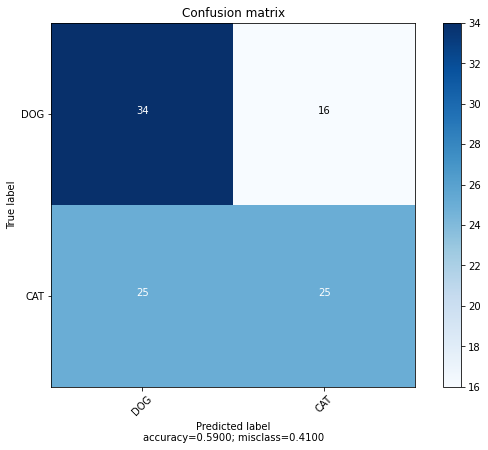

In [24]:
plot_confusion_matrix(cm, ['DOG', 'CAT'])

## Build fine tuned VGG16 Model.

In [25]:
vgg16_model = keras.applications.vgg16.VGG16() 

In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
for layer in model.layers:
    layer.trainable = False

In [30]:
model.add(Dense(units = 2, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 5, verbose = 2)

Epoch 1/5
100/100 - 148s - loss: 1.3501 - accuracy: 0.8930 - val_loss: 0.2147 - val_accuracy: 0.9600
Epoch 2/5
100/100 - 153s - loss: 0.1856 - accuracy: 0.9770 - val_loss: 0.1360 - val_accuracy: 0.9850
Epoch 3/5
100/100 - 154s - loss: 0.0880 - accuracy: 0.9840 - val_loss: 0.0951 - val_accuracy: 0.9850
Epoch 4/5
100/100 - 152s - loss: 0.0261 - accuracy: 0.9950 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 149s - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0988 - val_accuracy: 0.9850


In [44]:
predictions = model.predict(x = test_batches, verbose = 0)

In [45]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [46]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = 1))

In [47]:
cm

array([[50,  0],
       [ 2, 48]], dtype=int64)

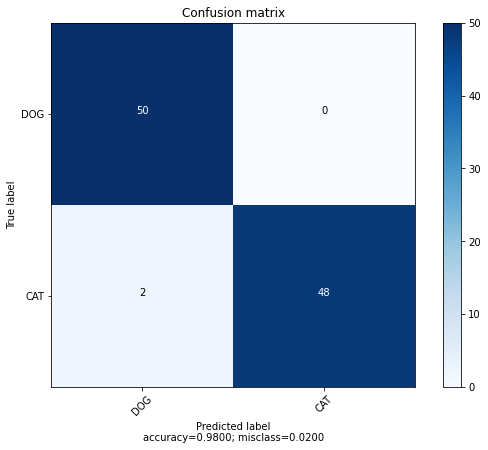

In [48]:
plot_confusion_matrix(cm, ['DOG', 'CAT'])

In [51]:
## Saving Vgg16 model

if os.path.isfile('model_vgg16.h5') is False:
    model.save("model_vgg16.h5")    

## Fine tuning with Mobilenet

In [84]:
mobile = keras.applications.mobilenet.MobileNet()

In [85]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [62]:
def image_preprocess(file):
    img_path = "D:/Data Science/Deep Learning/dogs-vs-cats/"
    img = image.load_img(img_path+file, target_size=(224,224))
    img_arr = image.img_to_array(img)
    img_arr_expanded_dim = np.expand_dims(img_arr, axis = 0)
    return keras.applications.mobilenet.preprocess_input(img_arr_expanded_dim)

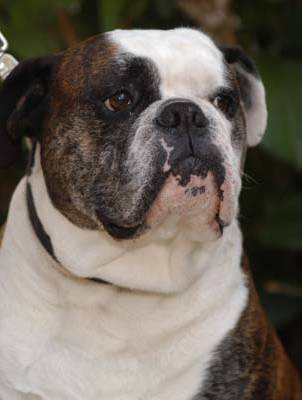

In [68]:
from IPython.display import Image
Image(filename = 'D:/Data Science/Deep Learning/dogs-vs-cats/dog.57.JPG')

In [69]:
preprocessed_image = image_preprocess("dog.57.JPG")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02108089', 'boxer', 0.817331),
  ('n02096585', 'Boston_bull', 0.119199425),
  ('n02108422', 'bull_mastiff', 0.029337963),
  ('n02108915', 'French_bulldog', 0.019363398),
  ('n02093428', 'American_Staffordshire_terrier', 0.008649778)]]

In [71]:
#Organize the sign language data into train, valid, test sets.

os.chdir('D:/Data Science/Deep Learning/sign-language')
if os.path.isdir('/train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        valid_sample = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_sample:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_sample = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_sample:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [74]:
train_path = "D:/Data Science/Deep Learning/sign-language/train" 
valid_path = "D:/Data Science/Deep Learning/sign-language/valid"
test_path = "D:/Data Science/Deep Learning/sign-language/test"

In [76]:
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = train_path, target_size = (224,224), batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = valid_path, target_size = (224,224), batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = test_path, target_size = (224,224), batch_size = 10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [87]:
x = mobile.layers[-6].output
output = Dense(units = 10, activation = 'softmax')(x)

In [88]:
model = Model(inputs = mobile.input, outputs = output)

In [89]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [90]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [91]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [94]:
model.fit(x = train_batches, validation_data = valid_batches, epochs=10, verbose = 2)

Epoch 1/10
172/172 - 42s - loss: 0.0884 - accuracy: 0.9731 - val_loss: 0.1832 - val_accuracy: 0.9367
Epoch 2/10
172/172 - 42s - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0753 - val_accuracy: 0.9733
Epoch 3/10
172/172 - 42s - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0661 - val_accuracy: 0.9833
Epoch 4/10
172/172 - 42s - loss: 0.0385 - accuracy: 0.9889 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 5/10
172/172 - 44s - loss: 0.0527 - accuracy: 0.9854 - val_loss: 0.2902 - val_accuracy: 0.9033
Epoch 6/10
172/172 - 47s - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.1103 - val_accuracy: 0.9667
Epoch 7/10
172/172 - 44s - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0700 - val_accuracy: 0.9733
Epoch 8/10
172/172 - 45s - loss: 0.0120 - accuracy: 0.9953 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 9/10
172/172 - 46s - loss: 0.0273 - accuracy: 0.9895 - val_loss: 0.0140 - val_accuracy: 0.9967
Epoch 10/10
172/172 - 48s - loss: 0.0440 - accuracy: 0.9877 - val_loss: 0.0267 - val_accura

In [95]:
predictions = model.predict(test_batches)

In [96]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = 1))

In [97]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

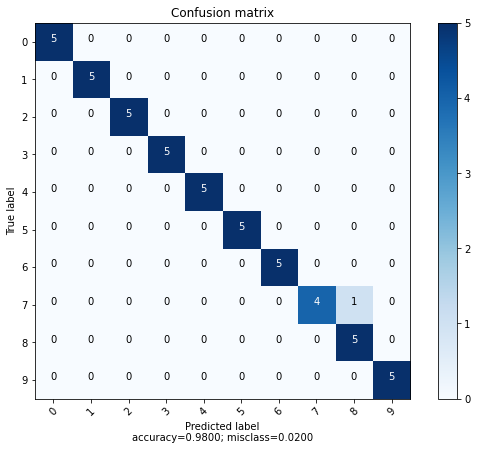

In [98]:
plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'])

In [101]:
sample_image = "D:/Data Science/Deep Learning/sign-language/test/9/IMG_1127.JPG"

In [114]:
def image_preprocess(file):
    img_path = "D:/Data Science/Deep Learning/sign-language/test/3/"
    img = image.load_img(img_path+file, target_size=(224,224))
    img_arr = image.img_to_array(img)
    img_arr_expanded_dim = np.expand_dims(img_arr, axis = 0)
    return keras.applications.mobilenet.preprocess_input(img_arr_expanded_dim)

In [105]:
Pre_process_img = image_preprocess('IMG_1127.JPG')

In [108]:
pred_sam = model.predict(Pre_process_img)

In [109]:
np.argmax(pred_sam, axis = 1)

array([9], dtype=int64)

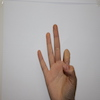

In [110]:
Image("D:/Data Science/Deep Learning/sign-language/test/9/IMG_1127.JPG")

In [115]:
Pre_process_img = image_preprocess("IMG_4449.JPG")

In [116]:
pred_sam = model.predict(Pre_process_img)
np.argmax(pred_sam, axis = 1)

array([3], dtype=int64)

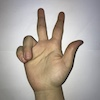

In [117]:
Image("D:/Data Science/Deep Learning/sign-language/test/3/IMG_4449.JPG")

In [120]:
"""

if os.path.isfile('mobile_model.h5') is False:
    model.save("mobile_model.h5")
    
if os.path.isfile("mobile_model_wgt.h5") is False:
    model.save_weights("mobile_model_wgt.h5") 
    
""""